## CLASSIFICATION PROBLEMLERİ ÇÖZÜMÜ

1. **İMPORTLAR YAPILIR**

2. **VERİ YÜKLENİR**

3. **VERİ İNCELENİR.** 
    A. df.info
    B. df.describe
    C. df.corr
    D. df.plot (heatmap, countplot vb.)
    
4. **VERİ TEMİZLEMEYE GEÇİLİR.**

    A. **RAKAMSAL OLMAYAN SÜTUNLAR RAKAMSAL SÜTUNLARA DÖNÜŞTÜRÜLÜR.**
        1) pd.get_dummies
        
    B. **VERİ TEMİZLERKEN HER SÜTUN TEKER TEKER İNCELENİR. HER SÜTUNDAKİ VERİNİN HEDEF VERİDEKİ ETKİSİ İNCELENİR. ÖRN: GERİ ÖDEME DURUMLARI KONTROL EDİLİR. EĞER BİRBİRİNE ÇOK YAKINSA SÜTUN KOMPLE SİLİNİR.**
    
    C. **ÖZELLİKLERİ DEĞERLENDİRİLİR. SÜTUNLARI DEĞERLENDİRİRKEN ÖZELLİKLE DEĞERLERİN DAĞILIMI İNCELENMELİDİR.**
        1) sns.countplot(df[],hue=df[])
        2) df[].unique()
        3) sorted(df[].unique())
        4) df.groupby("..")
        5) df[].value_counts()
        6) df[".."].value_counts().plot(kind="bar")
        
    D. **SONUCA ETKİSİNE BAKILIR.**
        1) df[].corr()
        
    E. **DİĞER SÜTUNLARLA ETKİLEŞİMİNE BAKILIR ÇOK PARALEL YA DA AYNI SONUÇLARI VERİYORSA O SÜTUNLARDAN BİRİSİ SİLİNİR.**
        1) df.drop([..] , axis=1)
        
    F. **VERİYİ TEMİZLERKEN SIK SIK HANGİLERİNİN RAKAMSAL OLMADIĞI, DÜZELTMEDİĞİMİZ VERİLERİ KONTROL EDERİZ.**
        1) df.select_dtypes(include=["object"]) 
        
    G. **VERİLERDEN TİPİNİ DEĞİŞTİRMEMİZ GEREKEN OLURSA DEĞİŞTİRİRİZ.**
        1) pd.to_datetime(df[".."])
        2) df[".."].astype(int)
        
    H. **VERİYİ BÖLMEMİZ GEREKİRSE BÖLERİZ.**
        1) df[".."].split()
        
    I. **EĞER ADRES VARSA POSTA KODUNU KULLANABİLİRİZ. VERİ İÇERİĞİNE BAĞLI OLARAK DEĞİŞEBİLİR BU DURUM.**
    
    J. **NULL VERİLERİ KONTROL EDERİZ VE DURUMUNA GÖRE DEĞERLENDİRİRİZ**
    
        1) df[..].isnull().sum()
        
        2) EĞER NULL VERİ SAYISI TOTALE ORANLA 0.5 ALTINDAYSA O ZAMAN SİLEBİLİRİZ.
        
        3) EĞER NULL VERİLERİN SAYISI FAZLAYSA DOLDURABİLİRİZ.
            a) ORTALAMA DEĞERE GÖRE ATAMA YAPILABİLİR
            b) VERİLERİ GRUPLANDIRARAK ORTALAMALARINI ALIP ATAMA YAPABİLİRİZ.
                1. BOŞ SÜTUNUN CORELASYONU EN YÜKSEK OLAN SÜTUN DEĞERLERİ, BU BOŞLARIN OLDUĞU SÜTUNA GÖRE GRUPLANDIRILIR VE ORTALAMALAR ALINIR.
                2. df.groupby([".."]).mean()[".."]
                3. YUKARIDAKİ SATIRLA GRUPLANDIRIP ORTALAMALARI BULDUKTAN SONRA BOŞ DEĞERLERİN OLDUĞU SATIRDAKİ KORELASYONU YÜKSEK SÜTUNUN DEĞERİNE BAKILIR, BU SÜTUNUN DEĞERLERİNE GÖRE GRUPLADIĞIMIZ SONUCA KARŞILIK GELEN DEĞER BOŞA ATANIR. YANİ BİRÇOK DEĞERİN OLDUĞU VE CİNSİYETİ HESAPLADIĞIMIZ BİR SETTE BOY İLE YAŞ KORELASYONDAYSA VE BOYDA BOŞ DEĞERLER VARSA, YAŞA GÖRE GRUPLAMA YAPIP ORTALAMALARI ALIR VE BOY DEĞERLERİNE BAKARIZ. HANGİ YAŞTA HANG BOY ORTALAMASI SONUCUNU BULMUŞSAK BOŞ OLA BOY SATIRLARINDAKİ YAŞ DEĞERİNE GÖRE O YAŞA DENK GELEN BOY ORTALAMASINI ATARIZ.
                4. MODEL OLUŞTURUP BU BOŞ DEĞERLER TAHMİN ETTİRİP ONA GÖRE ATAMA YAPARIZ. ÇOK UĞRAŞTIRIR.

5. **TRAİN_TEST_SPLİT YAPILIR**
    A. VERİLERİ BÖLERKEN PANDAS DEĞİL NUMPY ARRAY OLMASI GERETİĞİ İÇİN .VALUES ALINIR.
        1.X=df.drop("..",axis=1).values
          y=df[".."].values

6. **VERİ SCALE EDİLİR. SCALE EDİLİRKEN AŞAĞIDAKİ HUSUSLARA DİKKAT DİLİR.**
   
        A. from sklearn.preprocessing import MinMaxScaler
        B. scaler=MinMaxScaler()
        C. X_train=scaler.fit_transform(X_train)
        D. X_test=scaler.transform(X_test) # TEST SET FİT EDİLMEZ
    
7. **MODELİ OLUŞTURURUZ. LAYERLARI EKLERİZ. SON LAYER TEK SONUÇ VERECEĞİNDEN TEK NÖRONLU OLUR VE CLASSİFİCATİON PROBLEMİ OLDUĞUNDAN SON NÖRON İÇİN AKTİVASYON FOKSİYONU SİGMOİD SEÇİLİR.**

    A. İMPORTLAR YAPILIR.
        1) from tensorflow.keras.models import Sequential
        2) from tensorflow.keras.layers import Dense,Dropout,Activation
        
    B. LAYERLARI EKLİYORUZ.
        1) model.add(Dense(80,activation="relu"))
           model.add(Dropout(0.5))
           
    C. SON LAYER EKLENİR.
        1) model.add(Dense(1,activation="sigmoid"))
        
    D. MODEL COMPİLE EDİLİR. LOSS İÇİN HANGİ PRENSİBİN SEÇİLECEĞİ VE OPTİMİZER BELİRLENİR. OPTİMİZER GENELDE "ADAM" SEÇİLİR.
        1) model.compile(loss="binary_crossentropy", optimizer="adam")
        
8. **ERKEN DURDURMA-EARLY_STOPPING OLUŞTURULUR.**

    A. İMPORT YAPILIR.
        1) from tensorflow.keras.callbacks import EarlyStopping
        
    B. EARLY_STOPPING PARAMETRELERİ BELİRLENİR VE MODELİ FİT EDERKEN KIULLANILMAK ÜZERE BİR DEĞERE ATANIR.    
        1) early_stop=EarlyStopping(patience=10,verbose=1,monitor="val_loss",mode="min")
        
9. **MODEL FİT EDİLİR.**

    A. model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          batch_size=256,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop]
          )
          
10. **LOSS DEĞERLERİ BİR DEĞİŞKENE ATANIR VE PLOTLANIR.**

    A. losses=pd.DataFrame(model.history.history)
    
    B. losses.plot()
    
11. **MODEL EVALUATE EDİLİR.**

    A. İMPORTLAR YAPILIR.
        1) from sklearn.metrics import confusion_matrix,classification_report
        
    B. MODEL PREDİCT EDİLİR.
        1) predictions = model.predict_classes(X_test)
        
    C. SONUÇLAR PRİNT EDİLİR.
        1) print(confusion_matrix(y_test,predictions),"\n")
           print(classification_report(y_test,predictions))
           
12. **MODEL DAHA SONRA KULLANILMAK ÜZERE KAYDEDİLİR.**  

    A. İMPORT YAPILIR.
        1) from tensorflow.keras.models import load_model
        
    B. MODELE İSİM VERİLEREK H5 FORMATINDA KAYDEDİLİR.
        1) model.save(".... .h5")

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_info=pd.read_csv("../DATA/DATA/lending_club_info.csv")

In [3]:
data_info

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [4]:
data_info.iloc[0][0]

'loan_amnt'

In [5]:
data_info[data_info["LoanStatNew"]=="revol_util"].iloc[0][1]

'Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.'

In [6]:
def info(name):
    return data_info[data_info["LoanStatNew"]==name].iloc[0][1]

In [7]:
info("mort_acc")

'Number of mortgage accounts.'

In [8]:
info("application_type")

'Indicates whether the loan is an individual application or a joint application with two co-borrowers'

In [9]:
df = pd.read_csv("TensorFlow_FILES/DATA/lending_club_loan_two.csv")

In [10]:
df2=pd.read_csv("TensorFlow_FILES/DATA/lending_club_loan_two.csv") #ileride lazım olacak verileri değiştiriken bazen kullanacağım

In [11]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [12]:
df.info()
# null olan yerler var onları düzeltmek gerek

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [13]:
# loan_status bizim labelımız yani borcun ödenip ödenmediğidir.

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [14]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


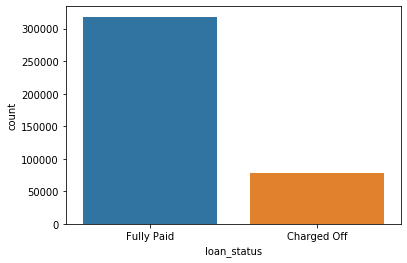

In [15]:
sns.countplot(df["loan_status"])

In [16]:
# veriyi modele sokabilmek için dummy variablesa dönüştürdüm
df["loan_status"] = pd.get_dummies(df["loan_status"],drop_first=True)

In [17]:
df["loan_status"]

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 396030, dtype: uint8

In [18]:
# şimdi biraz sütunlarımızı inceleyelim
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [19]:
type(df["term"][0])

str

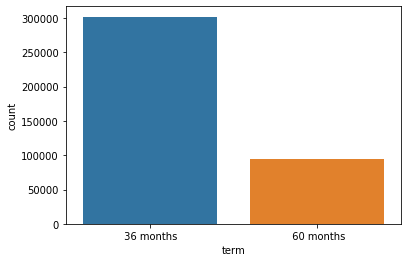

In [20]:
sns.countplot(df["term"])

In [21]:
df["term"] = pd.get_dummies(df["term"],drop_first=True)

In [22]:
df["term"]

0         0
1         0
2         0
3         0
4         1
         ..
396025    1
396026    0
396027    0
396028    1
396029    0
Name: term, Length: 396030, dtype: uint8

In [23]:
info("grade")

'LC assigned loan grade'

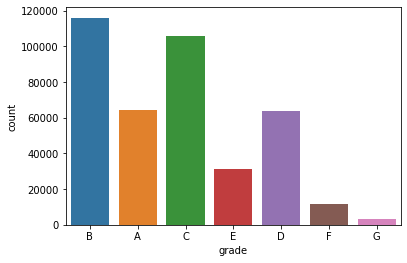

In [24]:
sns.countplot(df["grade"])

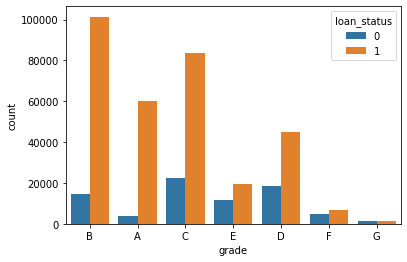

In [25]:
sns.countplot(df["grade"],hue=df["loan_status"])

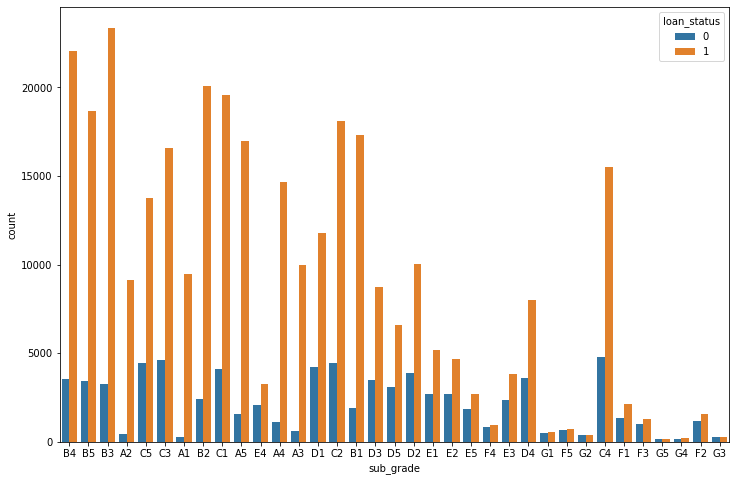

In [26]:
plt.figure(figsize=(12,8))
sns.countplot(df["sub_grade"],hue=df["loan_status"])

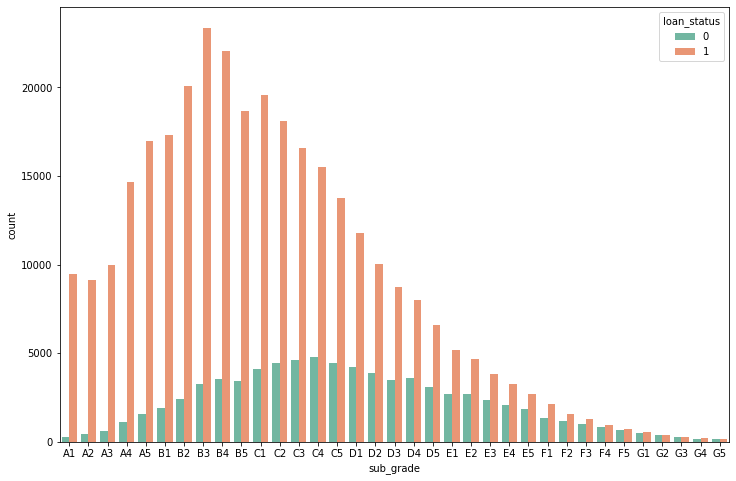

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(df["sub_grade"].sort_values(),hue=df["loan_status"],palette="Set2")

Özellikle F-G bandında kredileri geri ödemede ciddi sorunlar görülüyor. Biraz yakından bakalım

In [28]:
sub_grade_order=sorted(df["sub_grade"].unique())
sub_grade_order #önce sıraladık hepsini

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

In [29]:
sub_grade_order[25:]

['F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']

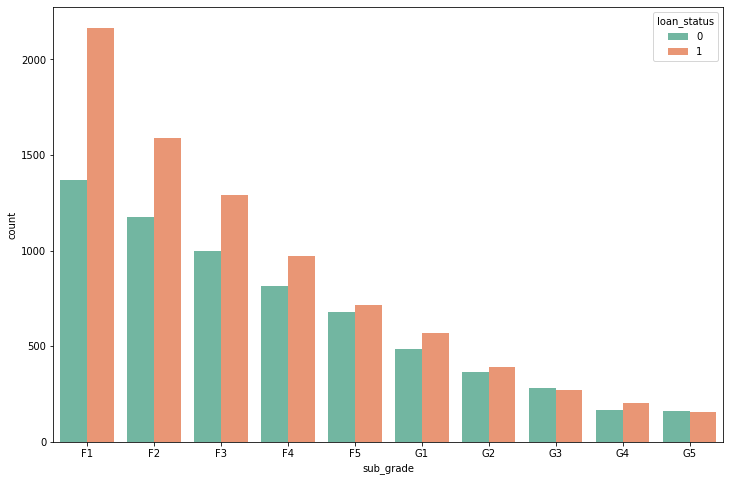

In [30]:
plt.figure(figsize=(12,8))
sns.countplot(x="sub_grade",data=df,order=sub_grade_order[25:],hue=df["loan_status"],palette="Set2")

In [31]:
# şimdi de loan_statuse göre bir bar plot yaparak corelasyonlara bakalım
df.groupby("loan_status").corr()

loan_amnt      term  int_rate  installment  \
loan_status                                                                    
0           loan_amnt              1.000000  0.450158  0.239662     0.944914   
            term                   0.450158  1.000000  0.443587     0.190322   
            int_rate               0.239662  0.443587  1.000000     0.232592   
            installment            0.944914  0.190322  0.232592     1.000000   
            annual_inc             0.346057  0.091878 -0.004488     0.337845   
            dti                   -0.001544  0.012522  0.025685    -0.002702   
            open_acc               0.197836  0.095120  0.026271     0.185941   
            pub_rec               -0.052198 -0.028129  0.016470    -0.041496   
            revol_bal              0.321166  0.113923 -0.001901     0.300818   
            revol_util             0.081180  0.040202  0.184093     0.097849   
            total_acc              0.247826  0.131899 -0.004180     0.221157   
            mort_acc               0.232081  0.125196 -0.036345     0.197487   
            pub_rec_bankruptcies  -0.089228 -0.027305  0.015180    -0.081369   
1           loan_amnt              1.000000  0.373163  0.138946     0.956327   
            term                   0.373163  1.000000  0.402035     0.137049   
            int_rate               0.138946  0.402035  1.000000     0.139179   
            installment            0.956327  0.137049  0.139179     1.000000   
            annual_inc             0.340308  0.065424 -0.054421     0.332420   
            dti                    0.035914  0.055874  0.146027     0.037677   
            open_acc               0.197178  0.070210 -0.000644     0.188622   
            pub_rec               -0.088461 -0.020420  0.071667    -0.078004   
            revol_bal              0.332272  0.082457 -0.010364     0.321159   
            revol_util             0.098929  0.042340  0.306540     0.126424   
            total_acc              0.219784  0.098833 -0.040173     0.199048   
            mort_acc               0.226568  0.108249 -0.073768     0.197089   
            pub_rec_bankruptcies  -0.112019 -0.020131  0.067714    -0.103614   

                                  annual_inc       dti  open_acc   pub_rec  \
loan_status                                                                  
0           loan_amnt               0.346057 -0.001544  0.197836 -0.052198   
            term                    0.091878  0.012522  0.095120 -0.028129   
            int_rate               -0.004488  0.025685  0.026271  0.016470   
            installment             0.337845 -0.002702  0.185941 -0.041496   
            annual_inc              1.000000 -0.039229  0.138521  0.006561   
            dti                    -0.039229  1.000000  0.064753 -0.007823   
            open_acc                0.138521  0.064753  1.000000 -0.005721   
            pub_rec                 0.006561 -0.007823 -0.005721  1.000000   
            revol_bal               0.260673  0.034821  0.243707 -0.090472   
            revol_util              0.037808  0.034082 -0.129294 -0.088642   
            total_acc               0.182538  0.052344  0.687056  0.020760   
            mort_acc                0.195500 -0.008215  0.109456  0.007951   
            pub_rec_bankruptcies   -0.037898 -0.005522 -0.007734  0.594747   
1           loan_amnt               0.340308  0.035914  0.197178 -0.088461   
            term                    0.065424  0.055874  0.070210 -0.020420   
            int_rate               -0.054421  0.146027 -0.000644  0.071667   
            installment             0.332420  0.037677  0.188622 -0.078004   
            annual_inc              1.000000 -0.165601  0.137892 -0.018555   
            dti                    -0.165601  1.000000  0.286340 -0.042337   
            open_acc                0.137892  0.286340  1.000000 -0.023450   
            pub_rec                -0.018555 -0.042337 -0.023450  1.000000   

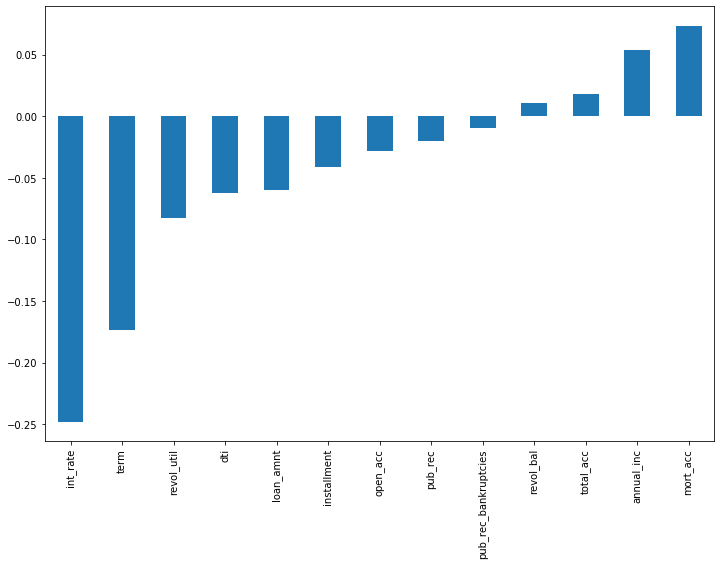

In [32]:
plt.figure(figsize=(12,8))
df.corr()["loan_status"].sort_values()[:-1].plot(kind="bar")

In [33]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,0,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,0,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,0,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,0,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,1,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [34]:
# dummy variables yapmaya devam edelim
df["home_ownership"].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [35]:
df["home_ownership"].replace({"NONE":"OTHER","ANY":"OTHER"},inplace=True) #home_ownershipte any ve none olanları other yaptık.

In [36]:
df["home_ownership"].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

In [37]:
df["home_ownership"]=pd.get_dummies(df["home_ownership"],drop_first=True) # dummy variables yapıyoruz

In [38]:
df["sub_grade"]=pd.get_dummies(df["sub_grade"],drop_first=True)

In [39]:
# grade sub_gradein alt kümesi gibi onun için ona ihtiyacımız yok
df.drop("grade",axis=1,inplace=True)

In [40]:
df.select_dtypes(include=['object']) # geriye kalan numeric olmayan s,tunları bulduk

,emp_title,emp_length,verification_status,issue_d,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,Marketing,10+ years,Not Verified,Jan-2015,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,Credit analyst,4 years,Not Verified,Jan-2015,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,Statistician,< 1 year,Source Verified,Jan-2015,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,Client Advocate,6 years,Not Verified,Nov-2014,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,Destiny Management Inc.,9 years,Verified,Apr-2013,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...
396025,licensed bankere,2 years,Source Verified,Oct-2015,debt_consolidation,Debt consolidation,Nov-2004,w,INDIVIDUAL,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,Agent,5 years,Source Verified,Feb-2015,debt_consolidation,Debt consolidation,Feb-2006,f,INDIVIDUAL,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,City Carrier,10+ years,Verified,Oct-2013,debt_consolidation,pay off credit cards,Mar-1997,f,INDIVIDUAL,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,"Gracon Services, Inc",10+ years,Verified,Aug-2012,debt_consolidation,Loanforpayoff,Nov-1990,f,INDIVIDUAL,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [41]:
info("initial_list_status")

'The initial listing status of the loan. Possible values are – W, F'

In [42]:
df["initial_list_status"].value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

In [43]:
df["initial_list_status"]=pd.get_dummies(df["initial_list_status"],drop_first=True)

In [44]:
info("application_type")

'Indicates whether the loan is an individual application or a joint application with two co-borrowers'

In [45]:
df["application_type"].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [46]:
df["application_type"]=pd.get_dummies(df["application_type"],drop_first=True)

In [47]:
info("verification_status")

'Indicates if income was verified by LC, not verified, or if the income source was verified'

In [48]:
df["verification_status"].value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

In [49]:
df["verification_status"]=pd.get_dummies(df["verification_status"],drop_first=True)

In [50]:
df.select_dtypes(include=['object']) # geriye kalan numeric olmayan sütunlara bakalım

,emp_title,emp_length,issue_d,purpose,title,earliest_cr_line,address
0,Marketing,10+ years,Jan-2015,vacation,Vacation,Jun-1990,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,Credit analyst,4 years,Jan-2015,debt_consolidation,Debt consolidation,Jul-2004,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,Statistician,< 1 year,Jan-2015,credit_card,Credit card refinancing,Aug-2007,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,Client Advocate,6 years,Nov-2014,credit_card,Credit card refinancing,Sep-2006,"823 Reid Ford\nDelacruzside, MA 00813"
4,Destiny Management Inc.,9 years,Apr-2013,credit_card,Credit Card Refinance,Mar-1999,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...
396025,licensed bankere,2 years,Oct-2015,debt_consolidation,Debt consolidation,Nov-2004,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,Agent,5 years,Feb-2015,debt_consolidation,Debt consolidation,Feb-2006,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,City Carrier,10+ years,Oct-2013,debt_consolidation,pay off credit cards,Mar-1997,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,"Gracon Services, Inc",10+ years,Aug-2012,debt_consolidation,Loanforpayoff,Nov-1990,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [51]:
info("purpose")

'A category provided by the borrower for the loan request. '

In [52]:
df["purpose"].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [53]:
df["purpose"]=pd.get_dummies(df["purpose"],drop_first=True)

In [54]:
info("title")

'The loan title provided by the borrower'

In [55]:
df["title"].value_counts()

Debt consolidation           152472
Credit card refinancing       51487
Home improvement              15264
Other                         12930
Debt Consolidation            11608
                              ...  
homeImprovement                   1
Better Interest Rate Loan         1
paydown credit cards              1
f-550                             1
Mission of Debt Free              1
Name: title, Length: 48817, dtype: int64

In [56]:
# title verileri purpose ile hemen hemen aynı. o yüzden siliyoruz
df.drop("title",axis=1,inplace=True)

In [57]:
df.select_dtypes(include=['object']) # geriye kalan numeric olmayan sütunlara bakalım

,emp_title,emp_length,issue_d,earliest_cr_line,address
0,Marketing,10+ years,Jan-2015,Jun-1990,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,Credit analyst,4 years,Jan-2015,Jul-2004,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,Statistician,< 1 year,Jan-2015,Aug-2007,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,Client Advocate,6 years,Nov-2014,Sep-2006,"823 Reid Ford\nDelacruzside, MA 00813"
4,Destiny Management Inc.,9 years,Apr-2013,Mar-1999,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...
396025,licensed bankere,2 years,Oct-2015,Nov-2004,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,Agent,5 years,Feb-2015,Feb-2006,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,City Carrier,10+ years,Oct-2013,Mar-1997,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,"Gracon Services, Inc",10+ years,Aug-2012,Nov-1990,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [58]:
info("issue_d")

'The month which the loan was funded'

In [59]:
# bu bizim modelimiz için uygun sütun değil çünkü borcun verilip verilmediğini önceden bilmiş olacağımız için veri sızması olur. Bu nedenle bunu sileceğiz
df.drop("issue_d",axis=1,inplace=True)

In [60]:
info("earliest_cr_line")

"The month the borrower's earliest reported credit line was opened"

In [61]:
type(df["earliest_cr_line"][0])

str

In [62]:
# bu string olduğu için önce date formatına çevireeğiz sona da yılını kullanacağız
df["earliest_cr_line"]=pd.to_datetime(df["earliest_cr_line"])

In [63]:
type(df["earliest_cr_line"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [64]:
df["earliest_cr_line_year"]=df["earliest_cr_line"].apply(lambda date:date.year)

In [65]:
df["earliest_cr_line_year"]

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line_year, Length: 396030, dtype: int64

In [66]:
df.drop("earliest_cr_line",axis=1,inplace=True)

In [67]:
# bu hala date formatında olduğu için bunu integera dönüştürüyorum
df["earliest_cr_line_year"]=df["earliest_cr_line_year"].astype(int)

In [68]:
type(df["earliest_cr_line_year"][0])

numpy.int32

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 24 columns):
loan_amnt                396030 non-null float64
term                     396030 non-null uint8
int_rate                 396030 non-null float64
installment              396030 non-null float64
sub_grade                396030 non-null uint8
emp_title                373103 non-null object
emp_length               377729 non-null object
home_ownership           396030 non-null uint8
annual_inc               396030 non-null float64
verification_status      396030 non-null uint8
loan_status              396030 non-null uint8
purpose                  396030 non-null uint8
dti                      396030 non-null float64
open_acc                 396030 non-null float64
pub_rec                  396030 non-null float64
revol_bal                396030 non-null float64
revol_util               395754 non-null float64
total_acc                396030 non-null float64
initial_list_status  

In [70]:
# adresteki zip_code ları zip_code sütunu yapıp int çevireceğim, adresi sileceğim
df["address"][0].split()[-1]

'22690'

In [71]:
df["zip_code"] = df["address"].apply(lambda address:address.split()[-1])

In [72]:
df["zip_code"]

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zip_code, Length: 396030, dtype: object

In [73]:
df["zip_code"]=df["zip_code"].astype(int)

In [74]:
df.drop("address",axis=1,inplace=True)

In [75]:
type(df["zip_code"][0])

numpy.int32

In [76]:
df.select_dtypes(include=["object"])

,emp_title,emp_length
0,Marketing,10+ years
1,Credit analyst,4 years
2,Statistician,< 1 year
3,Client Advocate,6 years
4,Destiny Management Inc.,9 years
...,...,...
396025,licensed bankere,2 years
396026,Agent,5 years
396027,City Carrier,10+ years
396028,"Gracon Services, Inc",10+ years


In [77]:
df["emp_title"].value_counts()

Teacher                               4389
Manager                               4250
Registered Nurse                      1856
RN                                    1846
Supervisor                            1830
                                      ... 
Nypro Asheville                          1
Kingston City Schools Consolidated       1
CondÃ© Nast                              1
Arctic Information Technology            1
Waterfall Asset Management               1
Name: emp_title, Length: 173105, dtype: int64

In [78]:
len(df["emp_title"].unique()) #bu kadar tekil meslek varmış bunlara dummy falan kar etmez silelim

173106

In [79]:
df.drop("emp_title",axis=1,inplace=True)

In [80]:
info("emp_length")

'Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. '

In [81]:
df["emp_length"]=df2["emp_length"]

In [82]:
df["emp_length"].isnull().sum()

18301

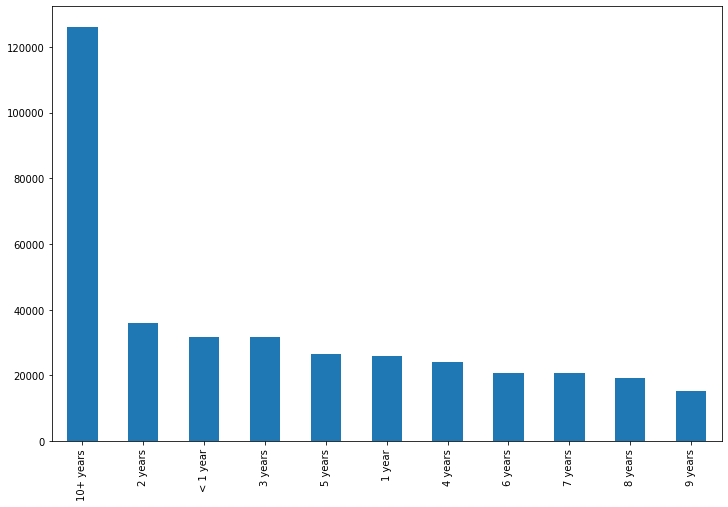

In [83]:
plt.figure(figsize=(12,8))
df["emp_length"].value_counts().plot(kind="bar")

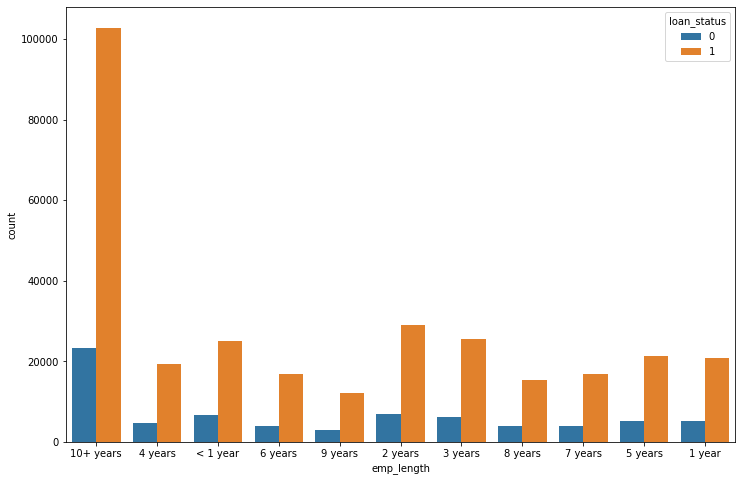

In [84]:
plt.figure(figsize=(12,8))
sns.countplot(x="emp_length",data=df,hue="loan_status")

In [85]:
# bu haliyle bişey ifade etmedi. şimdi her birinin geri ödeme oranlarına bakalım

len(df[df["loan_status"]==1])

318357

In [86]:
len(df[df["loan_status"]==0])

77673

In [87]:
len(df[(df["emp_length"]=="10+ years") & (df["loan_status"]==1)])/(len(df[df["emp_length"]=="10+ years"]))

0.8158139018255964

In [88]:
df["emp_length"].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [89]:
perc=pd.DataFrame(index=df["emp_length"].unique()[:-1],columns=["perc"])
perc

,perc
10+ years,NaN
4 years,NaN
< 1 year,NaN
6 years,NaN
9 years,NaN
2 years,NaN
3 years,NaN
8 years,NaN
7 years,NaN
5 years,NaN


In [90]:
for i in df["emp_length"].unique()[:-1]:

    perc.loc[i]=len(df[(df["emp_length"]==i) & (df["loan_status"]==1)])/(len(df[df["emp_length"]==i]))
    
perc

,perc
10+ years,0.815814
4 years,0.807615
< 1 year,0.793128
6 years,0.810806
9 years,0.79953
2 years,0.806738
3 years,0.804769
8 years,0.80024
7 years,0.805226
5 years,0.807813


<Figure size 720x432 with 0 Axes>

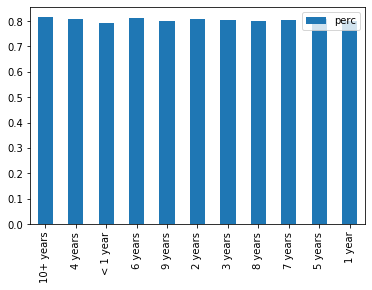

In [91]:
plt.figure(figsize=(10,6))
perc.plot(kind="bar")

In [92]:
# grafiken de anlaşılacağı üzere birbirleri arasında pek bir fark yok ayrıca sonuca da tesisi yok gibi. Bu yüzden siliyoruz.
df.drop("emp_length",axis=1,inplace=True)

In [93]:
df.select_dtypes(include=["object"]) #string kalmadı

""
0
1
2
3
4
...
396025
396026
396027
396028


In [94]:
df.select_dtypes(include=["bool"]) #boolean da yok

""
0
1
2
3
4
...
396025
396026
396027
396028


In [95]:
# şimdi sıra geldi diğer null verilerin icabına bakmaya

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 22 columns):
loan_amnt                396030 non-null float64
term                     396030 non-null uint8
int_rate                 396030 non-null float64
installment              396030 non-null float64
sub_grade                396030 non-null uint8
home_ownership           396030 non-null uint8
annual_inc               396030 non-null float64
verification_status      396030 non-null uint8
loan_status              396030 non-null uint8
purpose                  396030 non-null uint8
dti                      396030 non-null float64
open_acc                 396030 non-null float64
pub_rec                  396030 non-null float64
revol_bal                396030 non-null float64
revol_util               395754 non-null float64
total_acc                396030 non-null float64
initial_list_status      396030 non-null uint8
application_type         396030 non-null uint8
mort_acc               

In [96]:
info("revol_util")

'Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.'

In [97]:
df["revol_util"].head()

0    41.8
1    53.3
2    92.2
3    21.5
4    69.8
Name: revol_util, dtype: float64

In [98]:
df.isnull().sum()

loan_amnt                    0
term                         0
int_rate                     0
installment                  0
sub_grade                    0
home_ownership               0
annual_inc                   0
verification_status          0
loan_status                  0
purpose                      0
dti                          0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                 276
total_acc                    0
initial_list_status          0
application_type             0
mort_acc                 37795
pub_rec_bankruptcies       535
earliest_cr_line_year        0
zip_code                     0
dtype: int64

In [99]:
df["revol_util"].isnull().sum()/len(df)

0.0006969169002348307

In [100]:
396030-(535+276)

395219

In [101]:
df2=df

In [102]:
df=df2

In [103]:
# null değerler bizim bütün verimizin 0.0006sı kadar olduğundan yani 0.5in altında olduğundan boş değeri olan satırları siliyoruz

df.dropna(subset=["revol_util"],inplace=True)

In [104]:
df.isnull().sum()

loan_amnt                    0
term                         0
int_rate                     0
installment                  0
sub_grade                    0
home_ownership               0
annual_inc                   0
verification_status          0
loan_status                  0
purpose                      0
dti                          0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                   0
total_acc                    0
initial_list_status          0
application_type             0
mort_acc                 37740
pub_rec_bankruptcies       535
earliest_cr_line_year        0
zip_code                     0
dtype: int64

In [105]:
info("pub_rec_bankruptcies")

'Number of public record bankruptcies'

In [106]:
df["pub_rec_bankruptcies"].isnull().sum()/len(df)

0.0013518498865456824

In [107]:
# bunun da oranı 0.5ten küçük olduğu için siliyoruz

df.dropna(subset=["pub_rec_bankruptcies"],inplace=True)

In [108]:
df.isnull().sum()

loan_amnt                    0
term                         0
int_rate                     0
installment                  0
sub_grade                    0
home_ownership               0
annual_inc                   0
verification_status          0
loan_status                  0
purpose                      0
dti                          0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                   0
total_acc                    0
initial_list_status          0
application_type             0
mort_acc                 37205
pub_rec_bankruptcies         0
earliest_cr_line_year        0
zip_code                     0
dtype: int64

In [109]:
info("mort_acc")

'Number of mortgage accounts.'

In [110]:
df["mort_acc"].isnull().sum()/len(df)

0.09413768062770261

In [111]:
df["mort_acc"].head()

0    0.0
1    3.0
2    0.0
3    0.0
4    1.0
Name: mort_acc, dtype: float64

In [112]:
df["mort_acc"].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [113]:
df["mort_acc"].mean()

1.8137921980704665

In [114]:
df.corr()["loan_status"]["mort_acc"] #düşük bir korelasyon var.

0.07304773749665293

In [115]:
df["mort_acc"].value_counts()

0.0     139708
1.0      60384
2.0      49907
3.0      38022
4.0      27865
5.0      18182
6.0      11059
7.0       6050
8.0       3120
9.0       1653
10.0       863
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [116]:
df.corr()["mort_acc"]

loan_amnt                0.222381
term                     0.096211
int_rate                -0.082656
installment              0.193752
sub_grade                0.034032
home_ownership           0.000315
annual_inc               0.236277
verification_status     -0.008156
loan_status              0.073048
purpose                 -0.002969
dti                     -0.025401
open_acc                 0.109440
pub_rec                  0.011576
revol_bal                0.195063
revol_util               0.007514
total_acc                0.381205
initial_list_status      0.026902
application_type         0.001332
mort_acc                 1.000000
pub_rec_bankruptcies     0.027273
earliest_cr_line_year   -0.291318
zip_code                -0.024235
Name: mort_acc, dtype: float64

In [117]:
# total_acc sütunu en büyük korelasyona sahip
info("total_acc")

"The total number of credit lines currently in the borrower's credit file"

In [118]:
# şimdi her total_acc başına düşen mort_acc ortalamasını hesaplayacağız. Bunu groupby ile yapacağız

df.groupby(["total_acc"]).mean()["mort_acc"]

total_acc
2.0      0.000000
3.0      0.052326
4.0      0.066743
5.0      0.102108
6.0      0.151123
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [119]:
df[df["mort_acc"].isnull()]

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,earliest_cr_line_year,zip_code
22,4200.0,0,6.99,129.67,0,0,24000.0,0,1,0,...,0.0,0.0,0.0,7.0,0,1,NaN,0.0,2006,5113
25,6000.0,0,11.36,197.47,0,0,46680.0,0,0,0,...,0.0,4370.0,40.1,10.0,0,1,NaN,0.0,2003,30723
32,3000.0,0,6.03,91.31,0,0,64000.0,1,1,1,...,0.0,4912.0,13.4,18.0,0,1,NaN,0.0,2002,22690
41,28000.0,1,19.91,312.04,0,0,52000.0,0,0,0,...,0.0,29178.0,87.6,16.0,0,1,NaN,0.0,1988,22690
62,5000.0,0,10.39,118.45,0,0,66000.0,0,1,0,...,0.0,15807.0,20.0,17.0,0,1,NaN,0.0,2001,22690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395991,5600.0,0,9.63,179.73,0,0,54000.0,0,1,1,...,0.0,2776.0,33.0,21.0,0,1,NaN,0.0,1997,29597
395995,10000.0,0,10.25,323.85,0,0,55000.0,0,1,0,...,0.0,5571.0,42.2,20.0,0,1,NaN,0.0,1998,22690
396016,3000.0,0,5.42,90.48,0,0,70000.0,1,1,0,...,0.0,4062.0,12.6,23.0,0,1,NaN,0.0,1995,70466
396021,3200.0,0,5.42,96.52,0,0,33000.0,0,1,0,...,0.0,3985.0,7.6,50.0,0,1,NaN,0.0,1996,813


In [120]:
group_total=df.groupby(["total_acc"]).mean()["mort_acc"]

In [121]:
group_total

total_acc
2.0      0.000000
3.0      0.052326
4.0      0.066743
5.0      0.102108
6.0      0.151123
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [122]:
# şimdi mort_acc sütunundaki boş değerlere, bu satırlardaki total_acc değerine karşılık gelen ortalama mort_acc değerini atayacağız

df[df["mort_acc"].isnull()].iloc[0]["total_acc"]

7.0

In [123]:
group_total[7.0] #grupladığımız dfdeki değerlermize total_acc indisleri ile erişebiliyoruz

0.22182680901542112

In [124]:
group_total[df[df["mort_acc"].isnull()].iloc[0]["total_acc"]]

0.22182680901542112

In [125]:
for i in df[df["mort_acc"].isnull()].index:
    
    df["mort_acc"][i] = group_total[df["total_acc"][i]]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [126]:
df.isnull().sum()

loan_amnt                0
term                     0
int_rate                 0
installment              0
sub_grade                0
home_ownership           0
annual_inc               0
verification_status      0
loan_status              0
purpose                  0
dti                      0
open_acc                 0
pub_rec                  0
revol_bal                0
revol_util               0
total_acc                0
initial_list_status      0
application_type         0
mort_acc                 0
pub_rec_bankruptcies     0
earliest_cr_line_year    0
zip_code                 0
dtype: int64

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 22 columns):
loan_amnt                395219 non-null float64
term                     395219 non-null uint8
int_rate                 395219 non-null float64
installment              395219 non-null float64
sub_grade                395219 non-null uint8
home_ownership           395219 non-null uint8
annual_inc               395219 non-null float64
verification_status      395219 non-null uint8
loan_status              395219 non-null uint8
purpose                  395219 non-null uint8
dti                      395219 non-null float64
open_acc                 395219 non-null float64
pub_rec                  395219 non-null float64
revol_bal                395219 non-null float64
revol_util               395219 non-null float64
total_acc                395219 non-null float64
initial_list_status      395219 non-null uint8
application_type         395219 non-null uint8
mort_acc               

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X=df.drop("loan_status",axis=1).values
y=df["loan_status"].values

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [131]:
from sklearn.preprocessing import MinMaxScaler

In [132]:
scaler=MinMaxScaler()

In [133]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [134]:
from tensorflow.keras.models import Sequential

In [135]:
from tensorflow.keras.layers import Dense,Dropout,Activation

In [136]:
X_train.shape

(316175, 21)

In [137]:
model = Sequential()

model.add(Dense(80,activation="relu"))
model.add(Dropout(0.5))


model.add(Dense(40,activation="relu"))
model.add(Dropout(0.5))


model.add(Dense(20,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(10,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam")

In [138]:
from tensorflow.keras.callbacks import EarlyStopping

In [139]:
early_stop=EarlyStopping(patience=10,verbose=1,monitor="val_loss",mode="min")

In [140]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          batch_size=256,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop]
          )

Train on 316175 samples, validate on 79044 samples
Epoch 1/50
316175/316175 [==============================] - 7s 23us/sample - loss: 0.4781 - val_loss: 0.4075
Epoch 2/50
316175/316175 [==============================] - 7s 21us/sample - loss: 0.4023 - val_loss: 0.3415
Epoch 3/50
316175/316175 [==============================] - 6s 21us/sample - loss: 0.3564 - val_loss: 0.3161
Epoch 4/50
316175/316175 [==============================] - 6s 20us/sample - loss: 0.3391 - val_loss: 0.3044
Epoch 5/50
316175/316175 [==============================] - 6s 20us/sample - loss: 0.3297 - val_loss: 0.2961
Epoch 6/50
316175/316175 [==============================] - 6s 20us/sample - loss: 0.3238 - val_loss: 0.2905
Epoch 7/50
316175/316175 [==============================] - 6s 20us/sample - loss: 0.3199 - val_loss: 0.2895
Epoch 8/50
316175/316175 [==============================] - 6s 20us/sample - loss: 0.3217 - val_loss: 0.2903
Epoch 9/50
316175/316175 [==============================] - 6s 20us/sample - 

In [141]:
losses=pd.DataFrame(model.history.history)

In [142]:
losses.head()

,loss,val_loss
0,0.478065,0.407452
1,0.402337,0.341534
2,0.356373,0.316133
3,0.339092,0.304417
4,0.329674,0.296084


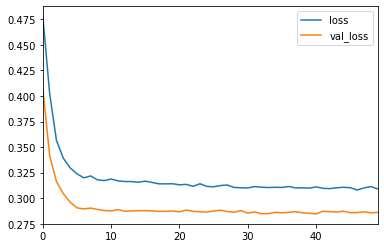

In [143]:
losses.plot()

In [144]:
from sklearn.metrics import confusion_matrix,classification_report

In [145]:
predictions = model.predict_classes(X_test)

In [146]:
print(confusion_matrix(y_test,predictions),"\n")
print(classification_report(y_test,predictions))

[[ 6713  8945]
 [    1 63385]] 

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [147]:
from tensorflow.keras.models import load_model

In [148]:
model.save("Full_Exercise_Model.h5")

In [149]:
import random
random.seed(101)

In [150]:
rand_index = random.randint(0,len(df)) # random bir index bulup onu modele sokup sonucu görmeye çalışacağız.

In [151]:
new_customer = df.drop("loan_status", axis=1).iloc[rand_index]

In [152]:
new_customer

loan_amnt                25000.00
term                         1.00
int_rate                    18.24
installment                638.11
sub_grade                    0.00
home_ownership               0.00
annual_inc               61665.00
verification_status          0.00
purpose                      0.00
dti                         30.11
open_acc                    16.00
pub_rec                      0.00
revol_bal                27778.00
revol_util                  65.50
total_acc                   46.00
initial_list_status          0.00
application_type             1.00
mort_acc                     0.00
pub_rec_bankruptcies         0.00
earliest_cr_line_year     1996.00
zip_code                 30723.00
Name: 305323, dtype: float64

In [155]:
model.predict_classes(new_customer.values.reshape(1,21))

array([[1]])

In [157]:
df.iloc[rand_index]["loan_status"]

1.0

Sonuç doğru çıktı. 